In [1]:
import numpy as np
import sklearn
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test_data_file_path = 'Test values.xlsx'
test_data = pd.ExcelFile(test_data_file_path)

sheet_names = test_data.sheet_names
print(*sheet_names, sep='\n')

PumpV with Flow rate
Rubber tube flow testing
12V pump-3 fan - temp testing
7V pump-3 fan- temp testing
3.5V pump-3 fan- temp testing
3.5V pump-no fan-temp testing
12V pump-no fan-temp testing
7.5V pump-no fan- temp testing
12V pump - 1 fan - temp testin 
7V pump-1 fan-tem testing
3.5V-1 fan-temp testing
12V pump-2 fan-temp testing
7V pump-2 fan-temp testing
3.5V pump-2 fan-temp testing
12V pump-chiller-temp testing
7V pump-chiller-temp testing
3.5V pump-chiller-temp testing


### Extract data from 2 fan set-up

In [4]:
def data_extraction(excel_sheet):
    """
    This function converts the information of one excel sheet.

    Paramters functionalities:

    header = 0 := means that in the sheet the first row will be 
    consider as the headers of the dataframe.

    usecols = range(3) := means that you are going to use only the first 3 columns
    in case you need to use from column 3 to 6 the range function should be used as 
    range(3,6)
    
    """
    data = pd.read_excel(test_data_file_path, excel_sheet, header=0, usecols=range(3))
    return data.ffill()

In [5]:
help(data_extraction)

Help on function data_extraction in module __main__:

data_extraction(excel_sheet)
    This function converts the information of one excel sheet.

    Paramters functionalities:

    header = 0 := means that in the sheet the first row will be
    consider as the headers of the dataframe.

    usecols = range(3) := means that you are going to use only the first 3 columns
    in case you need to use from column 3 to 6 the range function should be used as
    range(3,6)



In [6]:
volts = [3.5, 7, 12]
data = {}

general_name = 'V pump-2 fan-temp testing'

for volt in volts:
    data[f'{volt} pump'] = data_extraction(f'{volt}{general_name}')

time = 'Time (min)'
temp = 'Temperature (Celcius)'
temp_plot = 'Temperature (Celsius)'
fr = 'Flow rate (l/min)'

### Calculate avg temp by flow rate

In [8]:
def temp_mean_by_voltage(data):
    """

    This code will group the data by Flow Rate (fr) and take the mean
    for the temperature in each group for fr.
    
    """
    mean = data.groupby(fr)[temp].mean()
    return pd.DataFrame(mean).reset_index()

def temp_max_min_by_voltage(data):
    """

    This code will group the data by Flow Rate (fr) and take the first and last
    for the temperature in each group by fr.
    
    """
    max_min = data.groupby(fr)[temp].agg(['first', 'last'])
    return max_min

In [9]:
help(temp_mean_by_voltage)
print(end='\n\n')
help(temp_max_min_by_voltage)

Help on function temp_mean_by_voltage in module __main__:

temp_mean_by_voltage(data)
    This code will group the data by Flow Rate (fr) and take the mean
    for the temperature in each group for fr.



Help on function temp_max_min_by_voltage in module __main__:

temp_max_min_by_voltage(data)
    This code will group the data by Flow Rate (fr) and take the first and last
    for the temperature in each group by fr.



In [10]:
means_dict = {}

for volt in volts:
    means_dict[f'{volt} pump'] = temp_mean_by_voltage(data[f'{volt} pump'])
means_dict

{'3.5 pump':    Flow rate (l/min)  Temperature (Celcius)
 0               1.27              34.150167,
 '7 pump':    Flow rate (l/min)  Temperature (Celcius)
 0               3.40              31.381351
 1               3.83              35.151304,
 '12 pump':    Flow rate (l/min)  Temperature (Celcius)
 0               6.59              31.892759
 1               7.02              34.896774}

### Plot in a single graph temp vs flow for each voltage

In [12]:
max_min = {}
for volt in volts:
    max_min[f'{volt} pump'] = temp_max_min_by_voltage(data[f'{volt} pump']) 

max_min['12 pump']

,first,last
Flow rate (l/min),,
6.59,32.50,31.50
7.02,39.32,32.58


In [13]:
max_min['7 pump']

,first,last
Flow rate (l/min),,
3.40,32.50,30.86
3.83,39.02,32.63


7 30.86
12 31.5


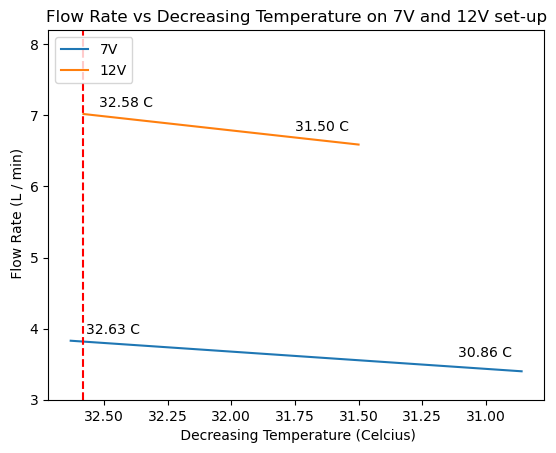

In [14]:
for volt in volts[1:]:
    plt.plot(max_min[f'{volt} pump']['last'],max_min[f'{volt} pump'].index, label=f'{volt}V')

ploting_fr = 'Flow Rate (L / min)'
plt.legend(loc='upper left')
plt.ylabel(f' {ploting_fr}')
plt.xlabel(f' Decreasing {temp}')

for volt in volts[1:]:
    x_0 = max_min[f'{volt} pump']['last'].iloc[0]
    x_f = max_min[f'{volt} pump']['last'].iloc[1]

    y_0 = means_dict[f'{volt} pump'][fr].iloc[0]
    y_f = means_dict[f'{volt} pump'][fr].iloc[1]

    print(volt,x_0)
    plt.text(x_0+.25, y_0+.2, f'{x_0:.2f} C')
    plt.text(x_f-.06, y_f+.1, f'{x_f:.2f} C')


plt.axvline(x=max_min['12 pump']['last'].iloc[1], color='red', linestyle='--', label='Vertical Line')
#plt.axvline(x=max_min['12 pump']['last'].iloc[0], color='red', linestyle='--', label='Vertical Line')
plt.gca().invert_xaxis()
plt.title('Flow Rate vs Decreasing Temperature on 7V and 12V set-up')
plt.ylim(3,8.2)
plt.savefig('Rep 3/flow_rate_vs_temp.png')
plt.show()

## Chiller Analysis

In [16]:
chiller = {}
chill = 'V pump-chiller-temp testing'

for volt in volts:
    chiller[f'{volt}V pump'] = data_extraction(f'{volt}{chill}')

states = list(chiller.keys())
#chiller

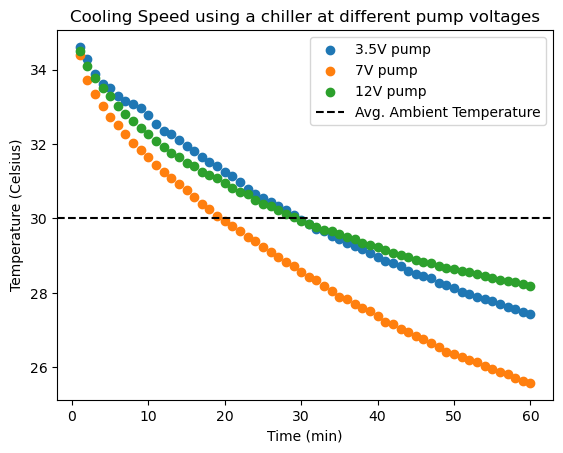

In [17]:
for state in states:
    plt.scatter(chiller[state][time], chiller[state][temp], label=f'{state}')


plt.title('Cooling Speed using a chiller at different pump voltages')
plt.xlabel(time)
plt.ylabel('Temperature (Celsius)')
plt.axhline(y=30, color='black', linestyle='--', label='Avg. Ambient Temperature')
plt.legend()
plt.savefig('Rep 3/chiller_behavior.png')
plt.show()

### Get each equation

#### Use a * t ^ (-b) + c as the equation

In [19]:
from scipy.optimize import curve_fit

def inverse(t, a, c, b, d):
    
    return a * t + b*np.exp(-d*t/100) +c

params = {}
for experiment in chiller.keys():
    popt, pcov = curve_fit(inverse, chiller[experiment][time], chiller[experiment][temp], maxfev=10000)
    params[experiment] = [float(f"{param:.6f}") for param in popt]

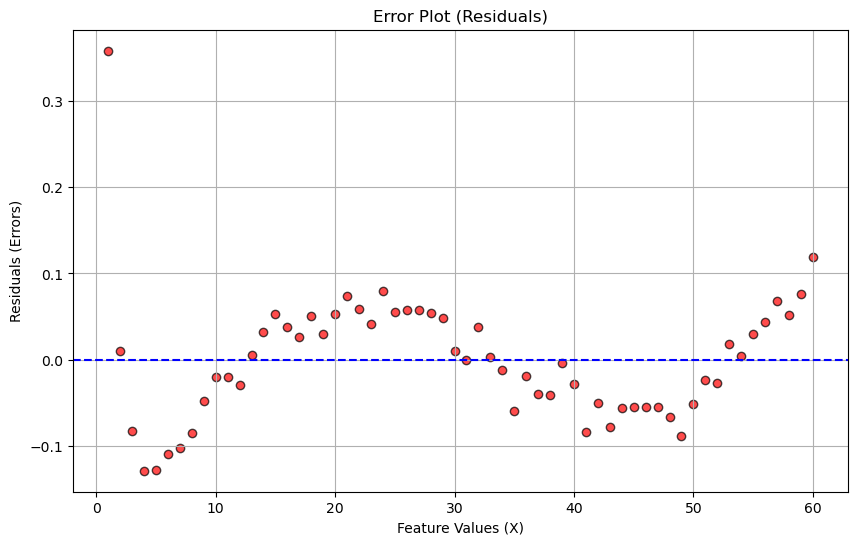

In [20]:
# Plotting the error plot
y_fit  = inverse(chiller['7V pump'][time], *params['7V pump'])

errors = (chiller['7V pump'][temp]-y_fit)
plt.figure(figsize=(10, 6))
plt.scatter(chiller['7V pump'][time], errors, color='red', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='blue', linestyle='--')
plt.xlabel('Feature Values (X)')
plt.ylabel('Residuals (Errors)')
plt.title('Error Plot (Residuals)')
plt.grid(True)
plt.show()